In [38]:
from gum import *

In [2]:
%config InlineBackend.figure_format = 'svg'

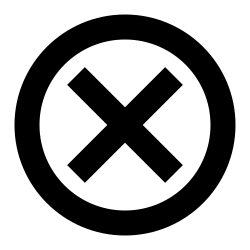

In [3]:
ex0 = Ray(-45, stroke_width=25) + Ray(45, stroke_width=25)
ex = Frame(ex0, margin=0.25)
ci = Circle(stroke_width=25)
bt = ex + ci
Frame(bt, margin=0.1)

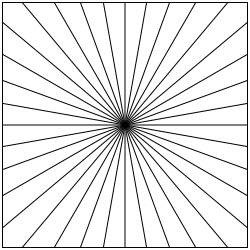

In [34]:
Box([Ray(th) for th in range(-90, 90, 10)]) + Rect()

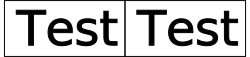

In [5]:
t = Node('Test')
t | t

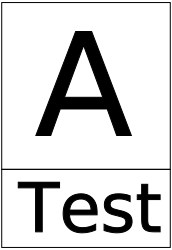

In [6]:
t1 = Node(text='A')
t2 = Node(text='Test')
t1 & t2

### Text Debug

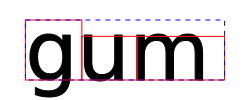

In [7]:
text = TextDebug(text='gum')
logo = Frame(text, padding=(0.1, 0.2))
s = SVG(logo, size=(250, 100))
s.save('gum.svg')
s

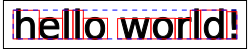

In [8]:
hello = TextDebug(text='hello world!')
s = Frame(hello, padding=(0.04, 0.2), border=1)
s.save('test/hello.svg')
s

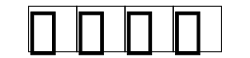

In [9]:
squares = list('🦊🍄🗻⬜')
squares = [Emoji(text=s) for s in squares]
squares = [Frame(s, border=1) for s in squares]
s = Frame(HStack(squares), margin=0.1)
s.save('test/emoji.svg')
s

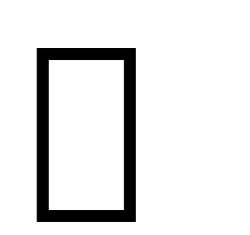

In [10]:
Frame(Emoji('🍄'), margin=0.1)

### Font Shaping

In [11]:
from gi.repository import HarfBuzz as hb

In [12]:
font, infos, positions, extents = get_text_shape('🗻', font='Noto Emoji', debug=True)

In [13]:
ext = extents[0].extents
print(ext.width, -ext.height)
print(ext.x_bearing, ext.y_bearing)

2555 2405
0 1898


In [14]:
pos = positions[0]
print(pos.x_offset, pos.y_offset)
print(pos.x_advance, pos.y_advance)

0 0
2550 0


### Layout

In [15]:
na = Node(text='A', pad=0.2)
nt = Node(text='Test', pad=0.2)
b = Bullet()

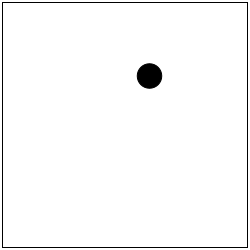

In [16]:
Point(b, x=0.6, y=0.3, r=0.05) + Rect()

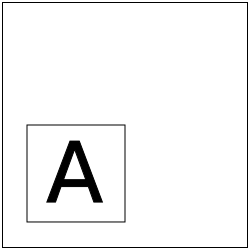

In [17]:
Point(na, x=0.3, y=0.7, r=0.2) + Rect()

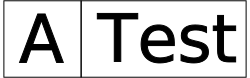

In [18]:
na | nt

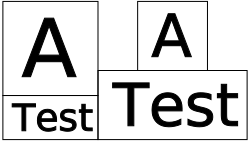

In [19]:
VStack([na, nt], expand=True) | VStack([na, nt], expand=False)

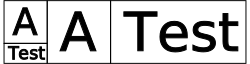

In [20]:
(na & nt) | (na | nt)

### Plots

In [21]:
ticks = {0.15: 'hello', 0.35: '0.3', 0.5: 'abc', 0.8: 'world'}

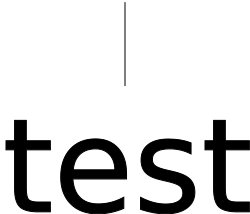

In [22]:
VTick('test')

In [23]:
HScale(ticks)

In [24]:
HAxis(ticks)

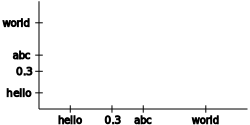

In [25]:
Axes(xticks=ticks, yticks=ticks, aspect=2)

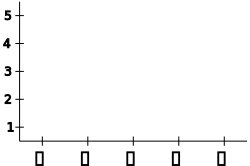

In [26]:
Axes(
    xticks={0.1: Emoji('🍄'), 0.3: Emoji('🍩'), 0.5: Emoji('🚀'), 0.7: Emoji('🦊'), 0.9: Emoji('🐋')},
    yticks={0.1: '1', 0.3: '2', 0.5: '3', 0.7: '4', 0.9: '5'},
    aspect=1.5, xaxis_tick_text_scale=1.5
)

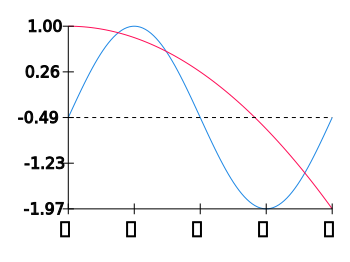

In [99]:
xlim = 0, 2*np.pi

line1 = SymPath(np.sin, xlim=xlim, stroke='#1e88e5')
line2 = SymPath(lambda x: -0.05*x**2, xlim=xlim, stroke='#ff0d57')
line3 = SymPath(lambda x: 0, xlim=xlim, stroke_dasharray=4)

xticks = {x: Emoji(e) for x, e in zip(np.linspace(*xlim, 5), '🍄🍩🚀🦊🐋')}
plot = Plot([line1, line2, line3], xticks=xticks, aspect=1.5, xaxis_tick_text_scale=1.5)

SVG(Frame(plot, padding=(0.05, 0.1)), size=350)